# Visualization of College Data


With such a wide and varied dataset, the topics we could explore through queries are endless. Here, we've selected a few that we hope to find clearer answers to through graphs.
- Is there a correlation between test scores and admissions rates?
- Do more expensive schools offer better career results? (i.e., how is the return on investment?)
- How do different types of institutions (public, private, for-profit) compare?
- Which areas of study offer the best results?


## Imports

In [ ]:
import sys
print(sys.version) # making sure we're on the right conda env

In [27]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # general plotting
import matplotlib as mpl # for figure quality (dpi)
import matplotlib.font_manager as fonts
import os
import math

## Formatting

In [28]:
fpaths = fonts.findSystemFonts()
for i in fpaths:
    f = fonts.get_font(i)
    print(f.family_name)

.New York
Futura
Khmer MN
Al Nile
Corsiva Hebrew
Noto Sans Egyptian Hieroglyphs
Beirut
Noto Sans PhagsPa
Savoye LET
Diwan Kufi
Luxi Sans
Noto Sans Miao
Arial
Noto Sans Armenian
Noto Sans Cham
Goha-Tibeb Zemen
Noto Sans Phoenician
Noto Sans Tai Le
Gurmukhi Sangam MN
Noto Serif Balinese
STIXIntegralsSm
Raanana
Times New Roman
Noto Sans Old Persian
Noto Sans Sora Sompeng
Bradley Hand
Noto Sans Lycian
Noto Sans Ol Chiki
KufiStandardGK
DIN Condensed
Noto Sans Warang Citi
Noto Sans Hanunoo
Noto Sans Tai Tham
STIXVariants
STIXIntegralsSm
STIXSizeTwoSym
Mishafi Gold
Noto Sans Gothic
Wingdings 2
Impact
.New York
Bitstream Vera Serif
Seravek
Serto Mardin
Hiragino Mincho ProN
Luxi Mono
Noto Sans Sundanese
Apple Braille
Hiragino Sans
Noto Sans Buginese
Bodoni Ornaments
Serto Jerusalem Outline
System Font
Symbol
STIXSizeThreeSym
Lao MN
Gurmukhi MT
Estrangelo TurAbdin
Noto Sans Mandaic
Nunito
KufiStandardGK
.Arabic UI Display
Bitstream Vera Sans Mono
Kohinoor Telugu
Devanagari Sangam MN
Noto Sans Sh

RuntimeError: In FT2Font: Could not set the fontsize (error code 0x17)

In [116]:
# Fontsize
fs = 12

# Figure quality
mpl.rcParams['figure.dpi']= 100 # in notebook resolution
mpl.rc("savefig", dpi=400) # higher resolution when saving

# Set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Tahoma'

# Set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#191f25'
plt.rcParams['axes.linewidth']= 1
plt.rcParams['xtick.color']='#191f25'
plt.rcParams['ytick.color']='#191f25'
plt.rcParams['text.color']='#191f25'

## Image folder for storing plots

In [113]:
# Create directory if doesn't already exist
img_directory = './images/plots'
if not os.path.exists(img_directory):
    os.mkdir(img_directory)
    print("Directory: " , img_directory ,  " created.")

## Connect to College database 

In [5]:
mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd='your pw here',
    auth_plugin='mysql_native_password',
    database='College') 

Database cursor 

In [6]:
mycursor = mydb.cursor()

## Is there a correlation between test scores and admissions rates?

Let's take our query and graph it

In [109]:
Query1 = """select inst_name, act_midpoint, sat_avg, adm_rate from universities 
as u join test_scores as t on u.unit_id = t.unit_id;"""

In [110]:
mycursor.execute(Query1)

In [111]:
df = pd.DataFrame(mycursor,columns=['inst_name','act_midpoint', 'sat_avg', 'adm_rate'])

In [12]:
df.head()

,inst_name,act_midpoint,sat_avg,adm_rate
0,Alabama A & M University,17.0,939.0,0.9175
1,University of Alabama at Birmingham,26.0,1234.0,0.7366
2,Amridge University,NaN,NaN,NaN
3,University of Alabama in Huntsville,28.0,1319.0,0.8257
4,Alabama State University,17.0,946.0,0.9690


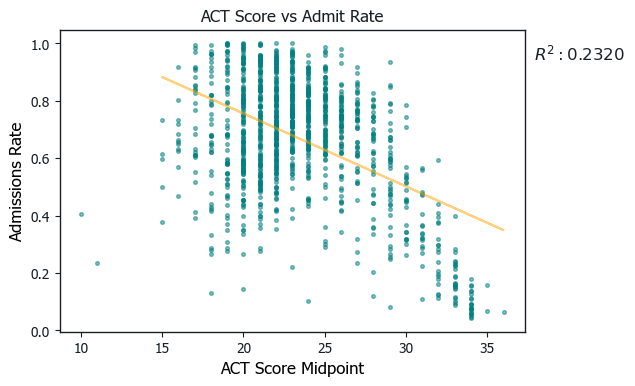

In [120]:
# first, plot the points
x = df['act_midpoint']
y = df['adm_rate']
plt.scatter(x, y, s=7, c='teal', alpha=0.5)

# create a best fit line
df1 = df[df.act_midpoint > 14] #remove the outliers
x = df1['act_midpoint']
y = df1['adm_rate']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, c='orange', alpha=0.5)

# calculate R^2 and annotate it
corr_matrix = np.corrcoef(x, y)
r2 = corr_matrix[0,1] ** 2
plt.annotate(f'$R^{2}: {r2:.4f}$', xy=(1.02,.9),xycoords='axes fraction',
             fontsize=fs)

# labels
plt.xlabel('ACT Score Midpoint', fontsize=fs)
plt.ylabel('Admissions Rate', fontsize=fs)
plt.title('ACT Score vs Admit Rate', fontsize=fs)

# save
plt.savefig(os.path.join(img_directory,'ACT.png'), bbox_inches="tight")

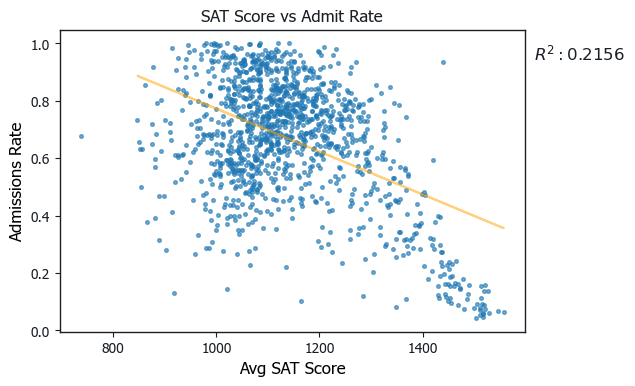

In [121]:
x = df['sat_avg']
y = df['adm_rate']
plt.scatter(x, y, s=7, alpha=0.6)

df1 = df[df.sat_avg > 800] #remove the outlier
x = df1['sat_avg']
y = df1['adm_rate']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, c='orange', alpha=0.5)

corr_matrix = np.corrcoef(x, y)
r2 = corr_matrix[0,1] ** 2
plt.annotate(f'$R^{2}: {r2:.4f}$', xy=(1.02,.9),xycoords='axes fraction',
             fontsize=fs)

plt.xlabel('Avg SAT Score', fontsize=fs)
plt.ylabel('Admissions Rate', fontsize=fs)
plt.title('SAT Score vs Admit Rate', fontsize=fs)

plt.savefig(os.path.join(img_directory,'SAT.png'), bbox_inches="tight")

If we zoom in at the most "elite" schools (high test score + low adm rate), however, the correlation is no longer as clear. (see the ACT scores 34 and above, and the below graph)

(1475.0, 1600.0)

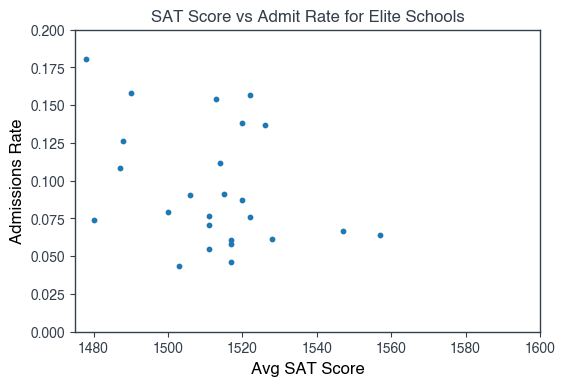

In [53]:
ax = plt.gca()

plt.scatter(df['sat_avg'], df['adm_rate'], s=10, alpha=1)
plt.xlabel('Avg SAT Score', fontsize=fs)
plt.ylabel('Admissions Rate', fontsize=fs)
plt.title('SAT Score vs Admit Rate for "Elite" Schools', fontsize=fs)
ax.set_ylim([0, 0.2])
ax.set_xlim([1475, 1600])

There's one more quirk worth looking at, and that's the very competitive schools with low test scores:

In [90]:
Query2 = """select inst_name, sat_avg, adm_rate from universities 
as u join test_scores as t on u.unit_id = t.unit_id
where adm_rate <= 0.15 and sat_avg is not null order by sat_avg;"""
mycursor.execute(Query2)
df = pd.DataFrame(mycursor, columns=["inst_name", "sat_avg", "adm_rate"])
df.head(10)

,inst_name,sat_avg,adm_rate
0,Dallas Christian College,917.0,0.1305
1,Ottawa University-Ottawa,1020.0,0.1454
2,College of the Ozarks,1164.0,0.1026
3,United States Military Academy,1284.0,0.1203
4,United States Naval Academy,1348.0,0.0833
5,United States Air Force Academy,1368.0,0.1108
6,University of California-Los Angeles,1429.0,0.1232
7,Amherst College,1431.0,0.1131
8,Tulane University of Louisiana,1444.0,0.1287
9,Barnard College,1445.0,0.1177


Notable results are the US Military Academies and UCLA

## Do more expensive schools offer better career results? (return on investment)

First, is there a correlation between average cost of attendance and job placement?
(We are using data from 6 years after, presumably 2 years after graduation.)
(Note that avg cost of attendance doesn't seem to take into account financial aid, so the actual amount students pay on average is probably less.)

In [123]:
Query3 = """select inst_name, median_earnings_6_years_after, 
coalesce(avg_cost_of_attendance, avg_cost_of_attendance_program_year) as avg_cost_of_attendance,
avg_net_price_public, avg_net_price_private, 
number_working_6_years_after/(number_working_6_years_after + number_not_working_6_years_after)
as percent_working from earnings as e join costs as c on
e.unit_id = c.unit_id join universities as u on e.unit_id = u.unit_id order by avg_cost_of_attendance_program_year desc"""
mycursor.execute(Query3)
df = pd.DataFrame(mycursor, columns=["inst_name", "med_earn", "avg_cost", 
                                     "avg_net_price_pub", "avg_net_price_priv", "percent_working"])

df.head()
# we'll drop L3Harris for the rest of this since it doesn't give us much plottable info

,inst_name,med_earn,avg_cost,avg_net_price_pub,avg_net_price_priv,percent_working
0,L3Harris,NaN,112254.0,NaN,106645.0,None
1,California Career College,40700.0,58195.0,NaN,53950.0,None
2,The International Culinary Center,30200.0,54949.0,NaN,46506.0,0.8301
3,Center for Allied Health Education,67400.0,46175.0,NaN,43322.0,None
4,Shepherds College,NaN,45345.0,NaN,13409.0,None


In [41]:
df.dtypes

inst_name             object
med_earnings_6yrs    float64
avg_cost             float64
avg_cost_py          float64
percent_working       object
dtype: object

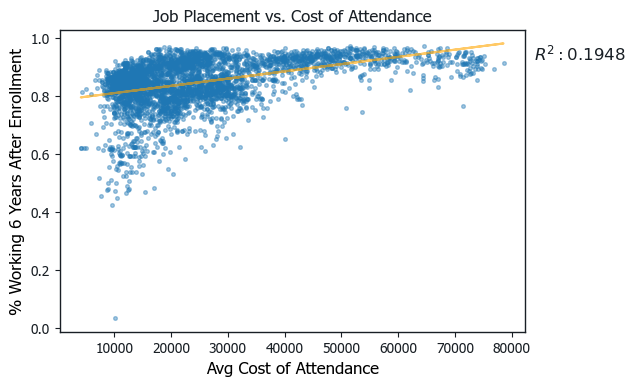

In [124]:
df = df[df.avg_cost < 100000] #remove L3Harris

# plot points
x = df['avg_cost']
y = df['percent_working']
plt.scatter(x, y, s=7, alpha=0.4)

# create best fit line
df1 = df[df.percent_working > 0.2] #remove the outlier
x = df1['avg_cost']
y = df1['percent_working'].astype(float) #originally a Decimal type
m, b = np.polyfit(x, y, 1) 
plt.plot(x, m*x + b, c='orange', alpha=0.6)

# calculate R^2 and annotate
corr_matrix = np.corrcoef(x, y)
r2 = corr_matrix[0,1] ** 2
plt.annotate(f'$R^{2}: {r2:.4f}$', xy=(1.02,.9),xycoords='axes fraction',
             fontsize=fs)

# labels
plt.xlabel('Avg Cost of Attendance', fontsize=fs)
plt.ylabel('% Working 6 Years After Enrollment', fontsize=fs)
plt.title('Job Placement vs. Cost of Attendance', fontsize=fs)

# save
plt.savefig(os.path.join(img_directory,'Job_placement.png'), bbox_inches="tight")

Now, what about Cost of Attendance and Median Earnings?

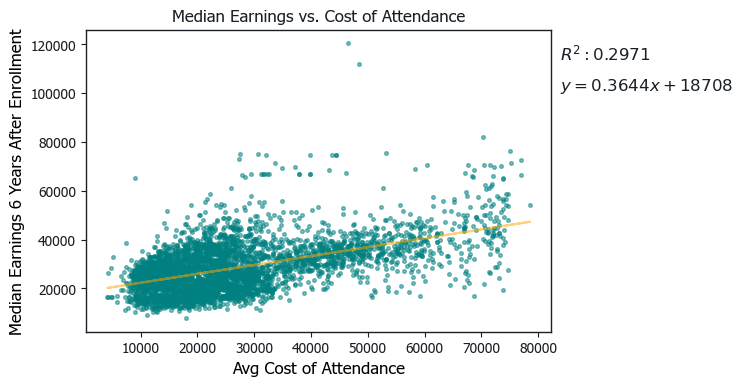

In [125]:
x = df['avg_cost']
y = df['med_earn']
plt.scatter(x, y, s=7, alpha=0.5, c='teal')

df1 = df[df.med_earn < 100000] #remove the outliers
x = df1['avg_cost']
y = df1['med_earn']
m, b = np.polyfit(x, y, 1) 
plt.plot(x, m*x + b, c='orange', alpha=0.5)

corr_matrix = np.corrcoef(x, y)
r2 = corr_matrix[0,1] ** 2
plt.annotate(f'$R^{2}: {r2:.4f}$', xy=(1.02,.9),xycoords='axes fraction',
             fontsize=fs)
plt.annotate(f'$y = {m:.4f}x + {b:.0f}$', xy=(1.02,.8),xycoords='axes fraction',
             fontsize=fs)

plt.xlabel('Avg Cost of Attendance', fontsize=fs)
plt.ylabel('Median Earnings 6 Years After Enrollment', fontsize=fs)
plt.title('Median Earnings vs. Cost of Attendance', fontsize=fs)

plt.savefig(os.path.join(img_directory,'Median_earnings.png'), bbox_inches="tight")

On the graph, there seems to be a band of high-earning schools, all w/ median earnings over 60k. Let's take a closer look at these:

In [127]:
Query3_5 = """select inst_name, median_earnings_6_years_after, avg_cost_of_attendance, avg_cost_of_attendance_program_year,
1 - number_not_working_6_years_after/(number_working_6_years_after + number_not_working_6_years_after)
as percent_working from earnings as e join costs as c on
e.unit_id = c.unit_id join universities as u on e.unit_id = u.unit_id 
where avg_cost_of_attendance is not null and median_earnings_6_years_after > 60000 order by avg_cost_of_attendance"""
mycursor.execute(Query3_5)
df = pd.DataFrame(mycursor, columns=["inst_name", "med_earn", "avg_cost", "avg_cost_py", "percent_working"])
df[['inst_name', 'med_earn', 'avg_cost']].head(15)

,inst_name,med_earn,avg_cost
0,United States Merchant Marine Academy,65200,9075
1,SUNY Maritime College,61200,25905
2,California State University Maritime Academy,73100,27259
3,Maine Maritime Academy,75200,27487
4,Massachusetts Maritime Academy,66300,27858
5,Georgia Institute of Technology-Main Campus,65500,28454
6,Chamberlain University-Texas,67100,29476
7,St Paul's School of Nursing-Staten Island,75100,30687
8,Chamberlain University-Florida,67100,31166
9,Chamberlain University-Ohio,67100,31488


Let's take a look at a few extremes

Highest Earnings:

In [59]:
Query4 = """select inst_name, median_earnings_6_years_after, avg_cost_of_attendance, avg_cost_of_attendance_program_year,
1 - number_not_working_6_years_after/(number_working_6_years_after + number_not_working_6_years_after)
as percent_working from earnings as e join costs as c on
e.unit_id = c.unit_id join universities as u on e.unit_id = u.unit_id order by median_earnings_6_years_after desc"""
mycursor.execute(Query4)
df = pd.DataFrame(mycursor, columns=["inst_name", "med_earn", "avg_cost", "avg_cost_py", "percent_working"])
df.head(15)

,inst_name,med_earn,avg_cost,avg_cost_py,percent_working
0,Philadelphia College of Osteopathic Medicine,127400.0,NaN,NaN,None
1,University of Health Sciences and Pharmacy in ...,120400.0,46470.0,NaN,None
2,Albany College of Pharmacy and Health Sciences,112100.0,48545.0,NaN,None
3,Western University of Health Sciences,108100.0,NaN,NaN,None
4,Salus University,100400.0,NaN,NaN,None
5,Samuel Merritt University,100100.0,NaN,NaN,None
6,Southern College of Optometry,99300.0,NaN,NaN,None
7,A T Still University of Health Sciences,99000.0,NaN,NaN,None
8,Illinois College of Optometry,96000.0,NaN,NaN,None
9,University of California-San Francisco,95400.0,NaN,NaN,None


These mostly seem to be medical-oriented schools. They don't have average cost statistics though.

Low earnings with highest costs:

In [69]:
Query5 = """select inst_name, median_earnings_6_years_after, avg_cost_of_attendance, avg_cost_of_attendance_program_year,
1 - number_not_working_6_years_after/(number_working_6_years_after + number_not_working_6_years_after)
as percent_working from earnings as e join costs as c on
e.unit_id = c.unit_id join universities as u on e.unit_id = u.unit_id 
where median_earnings_6_years_after < 30000 order by avg_cost_of_attendance desc"""
mycursor.execute(Query5)
df = pd.DataFrame(mycursor, columns=["inst_name", "med_earn", "avg_cost", "avg_cost_py", "percent_working"])
df.head(15)

,inst_name,med_earn,avg_cost,avg_cost_py,percent_working
0,Oberlin College,27400,74636.0,NaN,0.8992
1,Landmark College,19300,73821.0,NaN,0.8556
2,Bennington College,24100,73133.0,NaN,None
3,Bard College,28800,72789.0,NaN,0.8811
4,Sarah Lawrence College,28900,72469.0,NaN,0.8877
5,San Francisco Art Institute,26500,71486.0,NaN,0.7651
6,California Institute of the Arts,26900,71382.0,NaN,0.8665
7,Bard College at Simon's Rock,21700,70488.0,NaN,None
8,Manhattan School of Music,16800,68686.0,NaN,None
9,St. John's College,22300,67916.0,NaN,None


Mostly liberal arts/arts schools.

Since avg cost of attendance doesn't take into account financial aid awards, perhaps we should graph the median earnings again but with avg net price, which does calculate financial aid.

In [12]:
mycursor.execute(Query3)
df = pd.DataFrame(mycursor, columns=["inst_name", "med_earn", "avg_cost", "avg_cost_py", 
                                     "avg_net_price_pub", "avg_net_price_priv", "percent_working"])

# to graph both public & private schools, we'll merge public & private net price
for index in df.index:
    if math.isnan(df.loc[index, 'avg_net_price_priv']):
        df.loc[index, 'avg_net_price_priv'] = df.loc[index, 'avg_net_price_pub']

,inst_name,med_earn,avg_cost,avg_cost_py,avg_net_price_pub,avg_net_price_priv,percent_working
0,L3Harris,NaN,NaN,112254.0,NaN,106645.0,None
1,California Career College,40700.0,NaN,58195.0,NaN,53950.0,None
2,The International Culinary Center,30200.0,NaN,54949.0,NaN,46506.0,0.8301
3,Center for Allied Health Education,67400.0,NaN,46175.0,NaN,43322.0,None
4,Shepherds College,NaN,NaN,45345.0,NaN,13409.0,None
5,Universal Training Institute,NaN,NaN,43291.0,NaN,39580.0,None
6,Divers Academy International,43900.0,NaN,43077.0,NaN,40128.0,None
7,Southwest Institute of Healing Arts,22500.0,NaN,42980.0,NaN,40267.0,0.7696
8,The Vocational Nursing Institute Inc,NaN,NaN,42027.0,NaN,38839.0,None
9,Divers Institute of Technology,47100.0,NaN,41887.0,NaN,38534.0,0.8433


Text(0.5, 1.0, 'Median Earnings vs. Net Price')

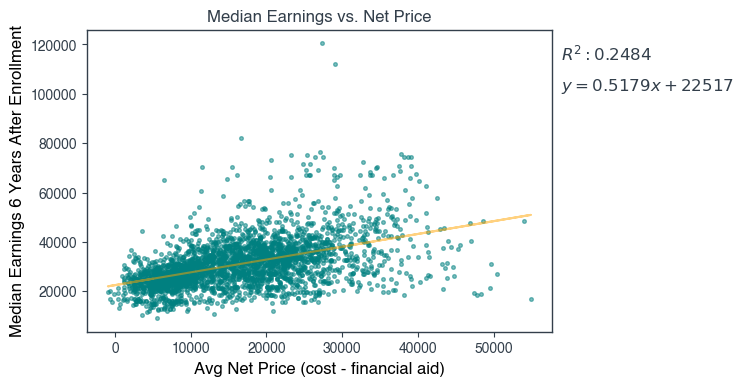

In [18]:
df = df[df.avg_cost < 100000] #remove L3Harris
x = df['avg_net_price_priv']
y = df['med_earn']
plt.scatter(x, y, s=7, alpha=0.5, c='teal')

df1 = df[df.med_earn < 100000] #remove the outliers
#df1['avg_net_price_priv'].dropna(inplace=True)
x = df1['avg_net_price_priv']
y = df1['med_earn']
m, b = np.polyfit(x, y, 1) 
plt.plot(x, m*x + b, c='orange', alpha=0.5)

corr_matrix = np.corrcoef(x, y)
r2 = corr_matrix[0,1] ** 2
plt.annotate(f'$R^{2}: {r2:.4f}$', xy=(1.02,.9),xycoords='axes fraction',
             fontsize=fs)
plt.annotate(f'$y = {m:.4f}x + {b:.0f}$', xy=(1.02,.8),xycoords='axes fraction',
             fontsize=fs)

plt.xlabel('Avg Net Price (cost minus financial aid)', fontsize=fs)
plt.ylabel('Median Earnings 6 Years After Enrollment', fontsize=fs)
plt.title('Median Earnings vs. Net Price', fontsize=fs)

# How do different types of institutions compare? 

In [128]:
Query6 = """select control, 
	avg(coalesce(avg_cost_of_attendance, avg_cost_of_attendance_program_year)) as avg_cost_of_attendance, 
	avg(coalesce(avg_net_price_public, avg_net_price_private)) as avg_net_price,
	avg(median_earnings_6_years_after) as avg_earnings,
	avg(number_working_6_years_after/(number_working_6_years_after + number_not_working_6_years_after))
    as avg_percent_working
from universities as u join costs as c on u.unit_id = c.unit_id 
join earnings as e on e.unit_id = c.unit_id group by control;"""
mycursor.execute(Query6)
df = pd.DataFrame(mycursor, columns=["control", "avg_cost", "avg_net_price", "avg_earnings", "avg_percent_working"])

Text(0.5, 1.0, 'Institution Types Compared')

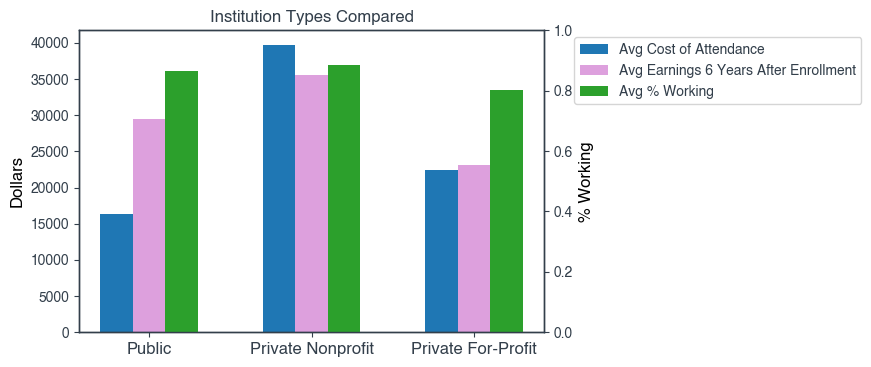

In [60]:
ax1 = plt.gca()
w = 0.2
x = np.arange(3)
plt.xticks(x + w, ['Public', 'Private Nonprofit', 'Private For-Profit'], fontsize=fs)
plt.ylabel('Dollars', fontsize=fs)
cost = ax1.bar(x, df['avg_cost'], width=w, align='center')
earn = ax1.bar(x + w, df['avg_earnings'], width=w, align='center', color='plum')
ax2 = ax1.twinx()
plt.ylabel('% Working', fontsize=fs)
ax2.set_ylim([0, 1.0])
working = ax2.bar(x + 2*w, df['avg_percent_working'], width=w, color='tab:green', align='center')
plt.legend([cost, earn, working], ['Avg Cost of Attendance', 
                                   'Avg Earnings 6 Years After Enrollment', 'Avg % Working'],
          bbox_to_anchor=(1.05, 1))
plt.title('Institution Types Compared')

Let's do the same with avg net price to account for financial aid.

Text(0.5, 1.0, 'Institution Types Compared w/ Net Price')

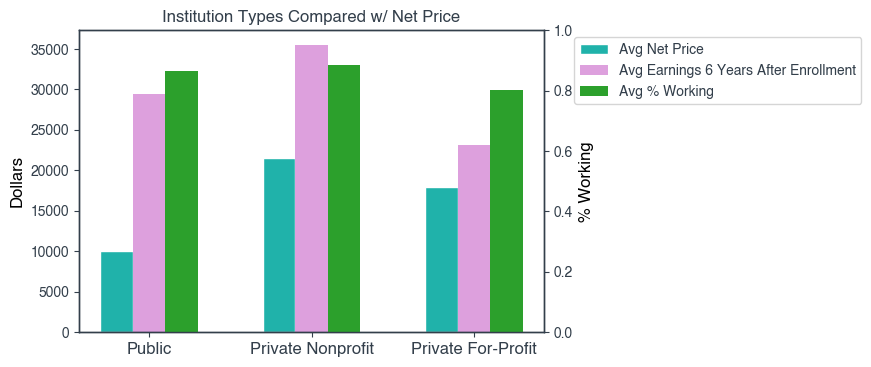

In [13]:
ax1 = plt.gca()
w = 0.2
x = np.arange(3)
plt.xticks(x + w, ['Public', 'Private Nonprofit', 'Private For-Profit'], fontsize=fs)
plt.ylabel('Dollars', fontsize=fs)
cost = ax1.bar(x, df['avg_net_price'], width=w, align='center', color='lightseagreen')
earn = ax1.bar(x + w, df['avg_earnings'], width=w, align='center', color='plum')
ax2 = ax1.twinx()
plt.ylabel('% Working', fontsize=fs)
ax2.set_ylim([0, 1.0])
working = ax2.bar(x + 2*w, df['avg_percent_working'], width=w, color='tab:green', align='center')
plt.legend([cost, earn, working], ['Avg Net Price', 
                                   'Avg Earnings 6 Years After Enrollment', 'Avg % Working'],
          bbox_to_anchor=(1.05, 1))
plt.title('Institution Types Compared w/ Net Price')

What if we combined the two so we can also see how much financial aid on average is given at each institution type?

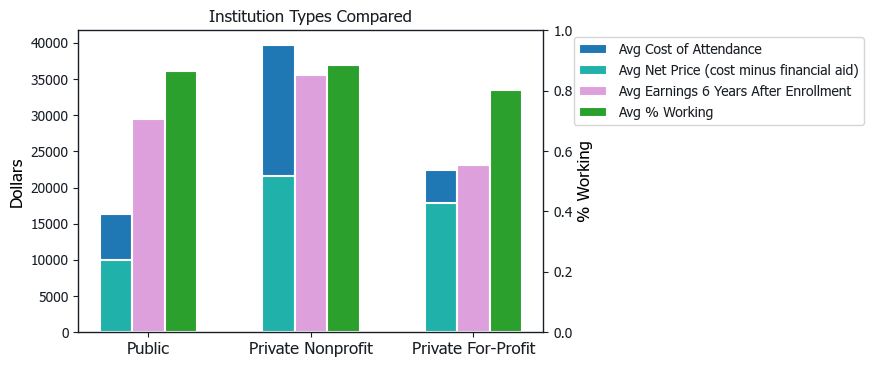

In [134]:
# setup
ax1 = plt.gca()
w = 0.2
x = np.arange(3)

# plot price & earnings
plt.xticks(x + w, ['Public', 'Private Nonprofit', 'Private For-Profit'], fontsize=fs)
plt.ylabel('Dollars', fontsize=fs)
cost = ax1.bar(x, df['avg_cost'], width=w, 
               edgecolor='white', linewidth=1.5)
price = ax1.bar(x, df['avg_net_price'], width=w, align='center', color='lightseagreen', 
               edgecolor='white', linewidth=1.5)
earn = ax1.bar(x + w, df['avg_earnings'], width=w, align='center', color='plum', 
               edgecolor='white', linewidth=1.5)

# create a twin axis to plot % working
ax2 = ax1.twinx()
plt.ylabel('% Working', fontsize=fs)
ax2.set_ylim([0, 1.0])
working = ax2.bar(x + 2*w, df['avg_percent_working'], width=w, color='tab:green', align='center', 
               edgecolor='white', linewidth=1.5)

# legend, title, & thinning lines for aesthetics
plt.legend([cost, price, earn, working], ['Avg Cost of Attendance', 'Avg Net Price (cost minus financial aid)', 
                                   'Avg Earnings 6 Years After Enrollment', 'Avg % Working'],
          bbox_to_anchor=(1.05, 1))
plt.title('Institution Types Compared')
ax1.spines['top'].set_color('none')
ax1.spines['left'].set_color('none')
ax1.spines['bottom'].set_color('none')
ax1.spines['right'].set_color('none')

# save
plt.savefig(os.path.join(img_directory,'Institution_type.png'), bbox_inches="tight")

# How do different areas of study compare?

Let's look at how the different CIP areas of study result career-wise
(Note that most degree-specific earnings information was privacy suppressed on the College Scorecard csvs, so we're essentially working with a reduced sample of schools, which may have been biased by the privacy suppression.)

In [135]:
Query7 = """select broad_subject_area, max(cip_2_digit) as cip, avg(median_earnings_2_years_after) as avg_earnings,
    avg(number_working_2_years_after / (number_working_2_years_after + number_not_working_2_years_after)) as avg_percent_working,
    count(broad_subject_area) as degree_count
from degrees_offered as d
join broad_cip_areas as b on cip_2_digit = d.cipcode div 100
group by broad_subject_area
having degree_count > 100
order by avg_earnings desc;"""
# because of the many nulls (privacysuppressed values), we're limiting ourselves to a sample size > 100
mycursor.execute(Query7)
df = pd.DataFrame(mycursor, columns=["broad_subject_area", "cip", "avg_earnings", "avg_percent_working", "degree_count"])


In [136]:
for index in df.index:
    df.loc[index, 'broad_subject_area'] = df.loc[index, 'broad_subject_area'].replace('"',
    '').replace('.', '').title().replace('And', 'and')
df.head()

,broad_subject_area,cip,avg_earnings,avg_percent_working,degree_count
0,Engineering\n,14,68918.8269,0.96865629,9996
1,Computer and Information Sciences and Support ...,11,54098.2476,0.94125852,12298
2,Science Technologies/Technicians\n,41,51595.4667,0.94792667,531
3,Engineering/Engineering-Related Technologies/T...,15,50623.6835,0.95597941,8617
4,Mathematics and Statistics\n,27,50343.3139,0.95799398,3721


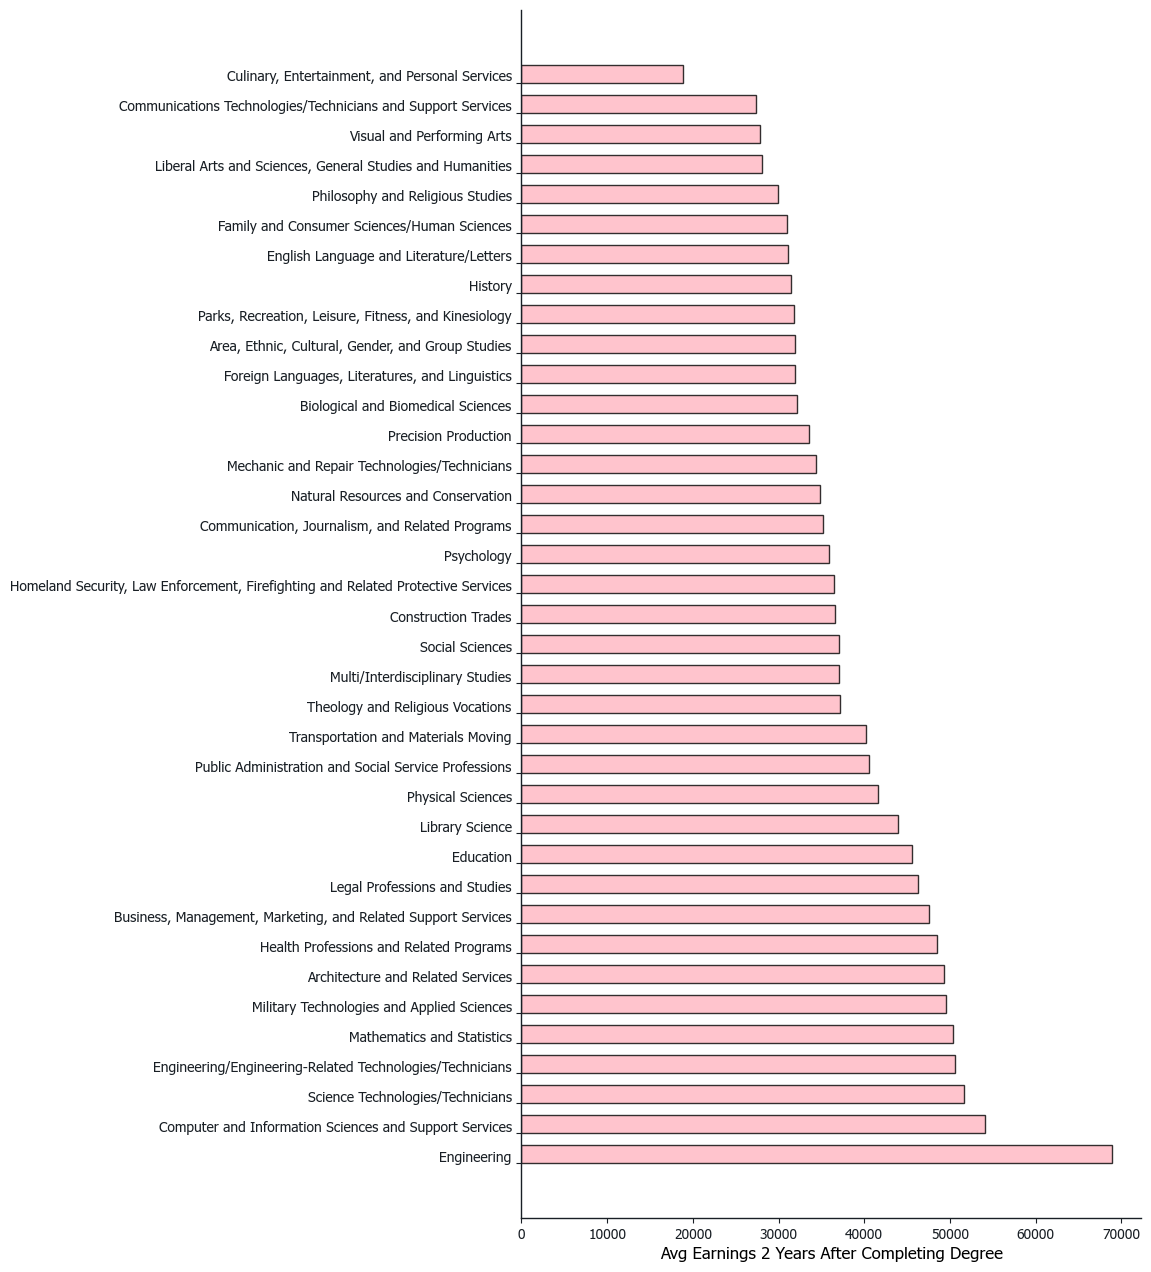

In [138]:
# setup - bigger graph than usual
fig = plt.figure(figsize=(8,16))
ax1 = plt.gca()

# plot bars
earn = ax1.barh(df['broad_subject_area'],df['avg_earnings'], align='edge',height=0.6,
         alpha=.8,color='lightpink',edgecolor='black')

plt.xlabel('Avg Earnings 2 Years After Completing Degree',fontsize=fs)


# was gonna plot both on one graph, but it looked terrible
# ax2 = ax1.twiny()
# plt.xlim([0.80,1.00])
# working = ax2.barh(df['broad_subject_area'],df['avg_percent_working'],align='center',height=0.1,
#                      color='tab:pink')
# working = ax2.plot(df['avg_percent_working'],df['broad_subject_area'], marker='.', ms=10,
#                    linestyle='', color='tab:cyan')


# aesthetics
ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')
# #ax.spines['bottom'].set_position(('axes', -0.02))
# ax.spines['left'].set_position(('axes', -1))

# save
plt.savefig(os.path.join(img_directory,'Areas_of_study.png'), bbox_inches="tight")


Let's see the same thing for job placement

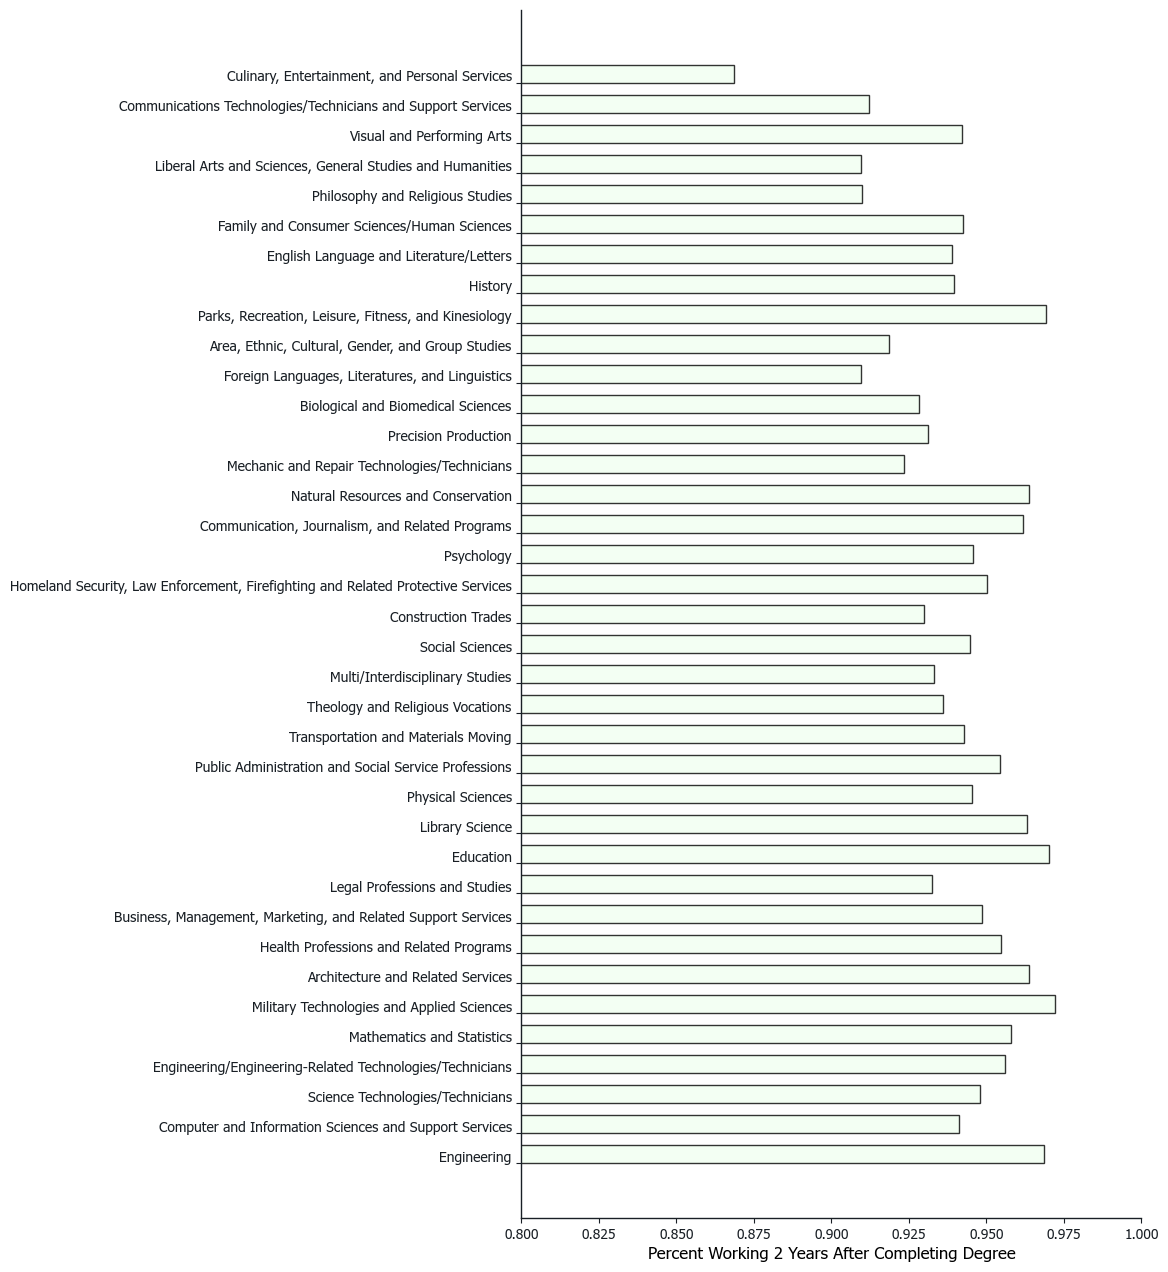

In [139]:
fig = plt.figure(figsize=(8,16))
ax1 = plt.gca()

plt.xlim([0.80,1.00])

earn = ax1.barh(df['broad_subject_area'],df['avg_percent_working'], align='edge',height=0.6,
         alpha=.8,color='honeydew',edgecolor='black')
plt.xlabel('Percent Working 2 Years After Completing Degree', fontsize=fs)
ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')

# save
plt.savefig(os.path.join(img_directory,'Areas_of_study_percent_working.png'), bbox_inches="tight")